In [22]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
from spotifykey import SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [24]:
artist_name = []
track_name = []
popularity = []
track_id = []
images = []
for i in range(0, 1000, 50):
    track_results = sp.search(q='year:2020', type='track', limit=50, offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        images.append(t['album']['images'][0]['url'])

In [18]:
track_dataframe = pd.DataFrame({'Artist':artist_name,'Track':track_name,'Track ID':track_id,'Popularity':popularity,'Image URL':images})
track_dataframe_sorted = track_dataframe.sort_values('Popularity', ascending=False).reset_index(drop=True)
track_dataframe_sorted.head(10)
print(track_dataframe_sorted.head(10))

           Artist                                    Track  \
0  Dream Supplier  Clean Baby Sleep White Noise (Loopable)   
1      The Weeknd                          Blinding Lights   
2   Glass Animals                               Heat Waves   
3      The Weeknd                          Save Your Tears   
4      Conan Gray                                  Heather   
5      Conan Gray               The Cut That Always Bleeds   
6      Hotel Ugly                  Shut up My Moms Calling   
7   Gracie Abrams                    I miss you, I’m sorry   
8    Taylor Swift                                 cardigan   
9    Taylor Swift                                   august   

                 Track ID  Popularity  \
0  0zirWZTcXBBwGsevrsIpvT          92   
1  0VjIjW4GlUZAMYd2vXMi3b          84   
2  3USxtqRwSYz57Ewm6wWRMp          81   
3  5QO79kh1waicV47BqGRL3g          81   
4  4xqrdfXkTW4T0RauPLv3WA          81   
5  7wTqEW5nrMhvyEhEyTnOMd          81   
6  3hxIUxnT27p5WcmjGUXNwx     

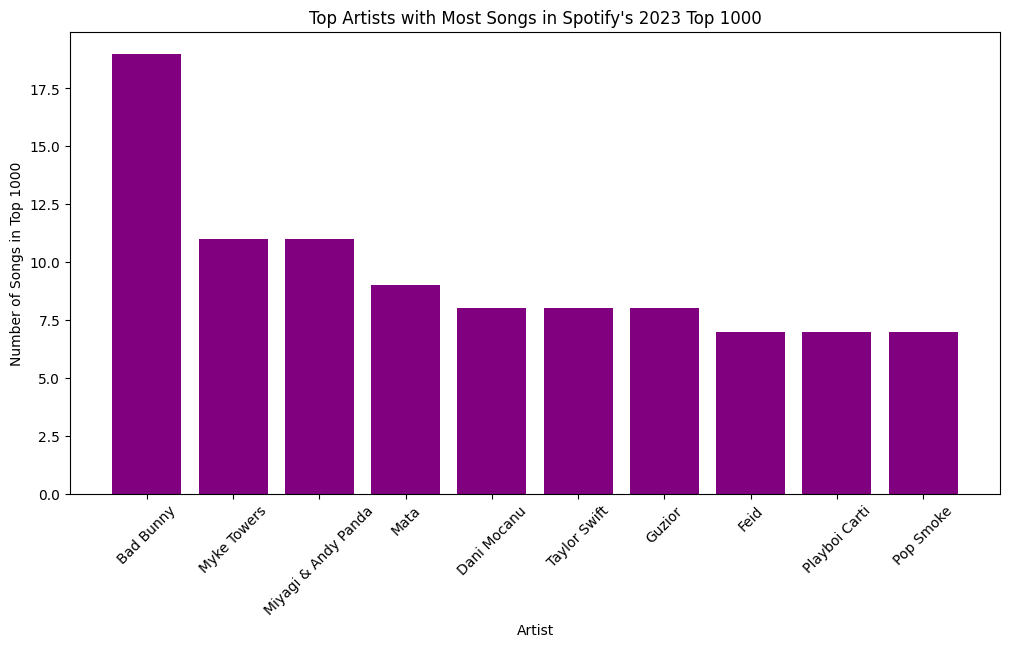

In [25]:
artist_counts = track_dataframe['Artist'].value_counts()
most_successful_artists = artist_counts.head(10)

# Plot the results
plt.figure(figsize=(12,6))
plt.bar(most_successful_artists.index, most_successful_artists.values, color='purple')
plt.xlabel("Artist")
plt.ylabel("Number of Songs in Top 1000")
plt.title("Top Artists with Most Songs in Spotify's 2023 Top 1000")
plt.xticks(rotation=45)
plt.show()